<a href="https://colab.research.google.com/github/MiguelMolina98/AnalisisDeAlgoritmos/blob/main/proyectofinalAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entradas:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Target:
[[0]
 [0]
 [0]
 [1]]

Alpha:
0.25

Bias:
[[-1.]
 [-1.]
 [-1.]
 [-1.]]

Matriz Aumentada:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

Pesos:
[[ 0.5]
 [ 0.5]
 [-0.5]]

a:
[[0.5]
 [1. ]
 [1. ]
 [1.5]]

y:
[[1]
 [1]
 [1]
 [1]]

Error:
1[array([0.75])]

Epoca: 1

Error:
[0.75]

Vector de Pesos Finales:
[array([[0.25],
       [0.25],
       [0.25]])]

Epoca: 2

Error:
[0.5]

Vector de Pesos Finales:
[array([[0.25],
       [0.25],
       [0.25]]), array([[0.5 ],
       [0.25],
       [0.25]])]

Epoca: 3

Error:
[0.75]

Vector de Pesos Finales:
[array([[0.25],
       [0.25],
       [0.25]]), array([[0.5 ],
       [0.25],
       [0.25]]), array([[0.5 ],
       [0.25],
       [0.5 ]])]

Epoca: 4

Error:
[0.5]

Vector de Pesos Finales:
[array([[0.25],
       [0.25],
       [0.25]]), array([[0.5 ],
       [0.25],
       [0.25]]), array([[0.5 ],
       [0.25],
       [0.5 ]]), array([[0.5],
       [0.5],
       [0.5]])]

Epoca: 5

Er

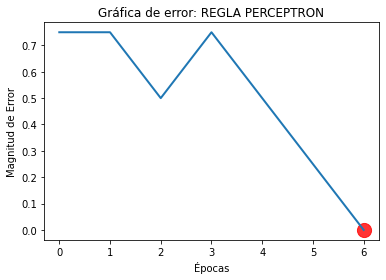

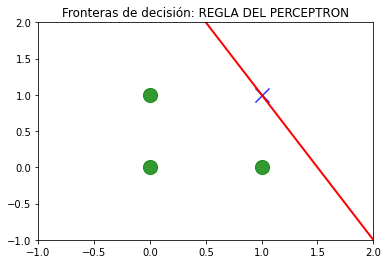


Pesos finales: 
[[0.5 ]
 [0.25]
 [0.75]]

REGLA DEL PERCEPTRON
Meta:    Predicción:
[0]--------[0]
[0]--------[0]
[0]--------[0]
[1]--------[1]

Tiempo requerido: 0.01918 ms.

Épocas requeridas: 6.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

err_vector = [] #vector de error
w_f = [] #vector de pesos finales

#entradas
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print(f"Entradas:\n{x}\n")

#target
t = np.array([[0], [0], [0], [1]])
print(f"Target:\n{t}\n")

#aprendizaje
alpha = 0.25
print(f"Alpha:\n{alpha}\n")

tic = time.time() #Iniciamos cronometro

#Se crea una columna de bias (-1) del tamaño de columnas de la matriz de entrada 
#Se establece el tamaño del bias que debe ser del numero de columas que tiene x
bias = np.shape(x)[0] #[0] -> columnas      [1] -> filas
bias = -1*np.ones((bias, 1)) # np.ones((filas,columnas))
print(f"Bias:\n{bias}\n")

#concatenar x con bias "Vector Aumentado
x = np.concatenate([x, bias], axis = 1) #1 -> añade a la derecha   0 -> añade abajo
print(f"Matriz Aumentada:\n{x}\n")

#matriz de pesos
w_i = np.array([[0.5],[0.5],[-0.5]])
#w_i = np.random.randn(3, 1) #matriz de pesos aleatorios
print(f"Pesos:\n{w_i}\n")

#-------------------------------------------------------------------------------
# Regla del perceptrón

# Producto vectorial punto
a = np.dot(x, w_i)
print(f"a:\n{a}\n")

#Funcion Limite Duro
y= np.uint32(a >= 0)
print(f"y:\n{y}\n")

# Función de costo -- MSE Error cuadrático medio
err = sum((t - y) ** 2) / len(y)
err_vector.append(err)
print(f"Error:\n1{err_vector}\n")

epoch = 0

while(sum(y != t)): #mientras la salida de la RNA no sea igual al target
  epoch += 1
  print(f"Epoca: {epoch}\n")

  for i in range(np.shape(x)[0]): #Repetir segun la cantidad de filas de x
    # Producto punto
    a = np.dot(x[i], w_i)

    #Limite Duro
    y[i]= np.uint32(a >= 0)

    # Actualización de pesos
    x_p = np.reshape(x[i], (len(w_i), 1)) #REACOMODA np.reshape(matriz,(filas,columnas))
    w_n = w_i + alpha * (t[i] - y[i]) * x_p
    w_i = w_n
    #print(f"Peso nuevo:\n{w_i}\n")
 
  # Función de costo -- MSE Error cuadrático medio
  err = sum((t - y) ** 2) / len(y)
  err_vector.append(err)
  print(f"Error:\n{err}\n")

  #Se añade al vector de pesos
  w_f.append(w_i)
  print(f"Vector de Pesos Finales:\n{w_f}\n")


toc = time.time() #Paro cronometro

# Plotting Error -- Graph
plt.figure(0)
plt.plot(err_vector, linewidth = 2)
plt.title('Gráfica de error: REGLA PERCEPTRON')
plt.ylabel('Magnitud de Error')
plt.xlabel('Épocas')
plt.scatter(len(err_vector) - 1, 0, color = 'r', s = 200, marker = 'o', alpha = 0.8)
plt.show()

# Plotting Decision Boundaries
plt.xlim([-1.0, 2.0])
plt.ylim([-1.0, 2.0])

patterns = np.unique(t) #Encuentra los elementos únicos de la matriz t

for patt in patterns:
  pos = np.where(patt == t)[0] # np.where(TRUE)[0]
  if patt == 0:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
  else:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

x1 = np.linspace(-1, 2)
x2 = w_i[2] / w_i[1] - (x1 * w_i[0]) / w_i[1]

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.title('Fronteras de decisión: REGLA DEL PERCEPTRON')
plt.show()
#------------------------------------------------------------------
#Pesos Finales
print('\nPesos finales: ')
for i in range(1):
    res = str(w_i)
    print(res)
    print()

#------------------------------------------------------------------
# Displaying Results
a = np.dot(x, w_i)
y= np.uint32(a >= 0)

print('REGLA DEL PERCEPTRON')
print('Meta:    Predicción:')
for i in range(len(y)):
    res = str(t[i]) + '--------' + str(y[i])
    print(res)

print(f'\nTiempo requerido: {toc - tic:.5f} ms.')
print(f'\nÉpocas requeridas: {epoch}.')
